In [1]:
import numpy as np
import obspy
from obspy import UTCDateTime, geodetics
from obspy.clients.fdsn import Client

print('example to obtain data')

example to obtain data


In [9]:
print("\nDownloading Ridgecrest event information...")
origin_time = obspy.UTCDateTime(2019, 7, 6, 3, 19, 53)
clntnm = 'IRIS'
client = Client(clntnm)
cat = client.get_events(starttime = origin_time - 20, endtime = origin_time + 20, minmagnitude = 7,includeallorigins=True)
print("Done\n")


Done



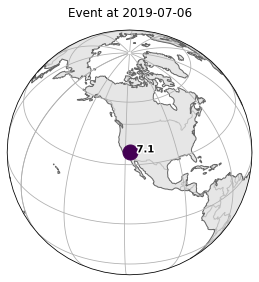

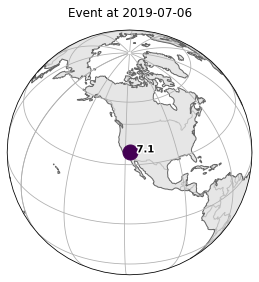

In [8]:
cat.plot(projection='ortho', resolution='l')  


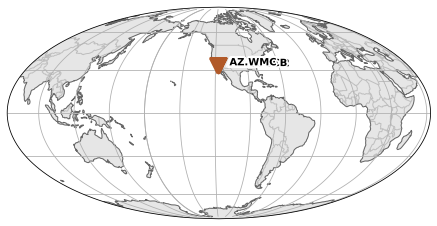

Inventory created at 2022-02-02T02:59:37.642000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2019-07-05...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			AZ
		Stations (29):
			AZ.BSAP (Borrego Springs Airport, CA, USA)
			AZ.BZN (Buzz Northerns Place, Anza, CA, USA)
			AZ.CPE (Camp Elliot, Miramar, CA, USA)
			AZ.CRY (Cary Ranch, Anza, CA, USA)
			AZ.CSLB (Cal State Long Beach, Long Beach, CA, USA)
			AZ.FRD (Ford Ranch, Anza, CA, USA)
			AZ.GARR (Garrison Ranch, CA, USA)
			AZ.HSSP (Hill Street, Anza, CA, USA)
			AZ.KNW (Keenwild Fire Station, Mountain Center, CA, USA)
			AZ.LVA2 (Lost Valley Scout Camp, CA, USA)
			AZ.MONP2 (Monument Peak TA Vault, Mt. Laguna, CA, USA)
			AZ.MTRP (Mission Trails Regional Park, Santee, CA, USA)
			AZ.PFO (Pinyon Flats Observatory, CA, USA)
			AZ.RDM (Red Mountain, Riverside Co, CA, USA)
			AZ.RRSP (Rouse Ridge, CA, USA)
			AZ.SCI2 (San Clemente

In [13]:
inventory = client.get_stations(network="AZ", station="*",
                                starttime=origin_time-86400,
                                endtime=origin_time+86400)
inventory.plot()  
print(inventory)

In [16]:
print(inventory.networks[0].stations[18])

Station SIO5 (Mt. Soledad, La Jolla, CA)
	Station Code: SIO5
	Channel Count: 0/27 (Selected/Total)
	2017-05-23T00:00:00.000000Z - 
	Access: open 
	Latitude: 32.84, Longitude: -117.25, Elevation: 217.0 m
	Available Channels:



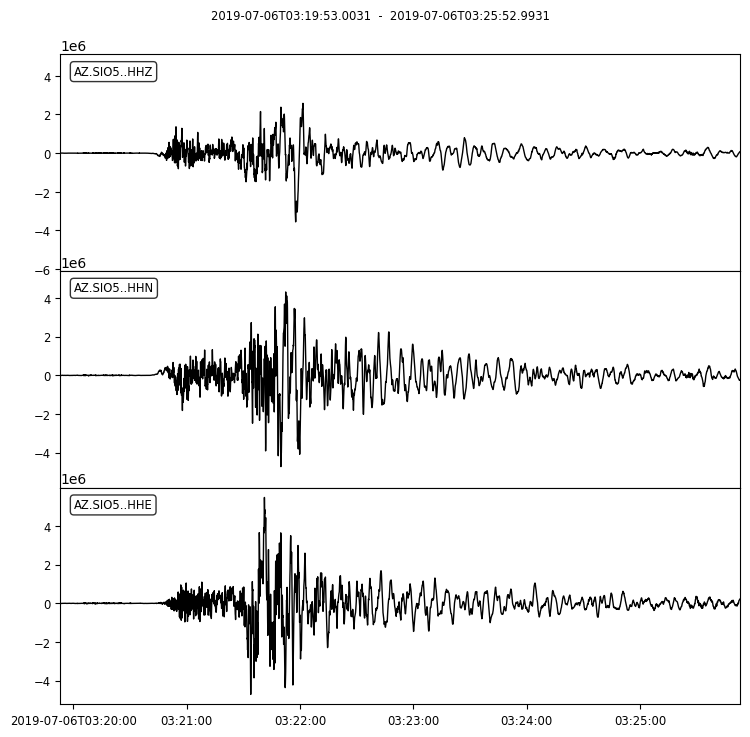

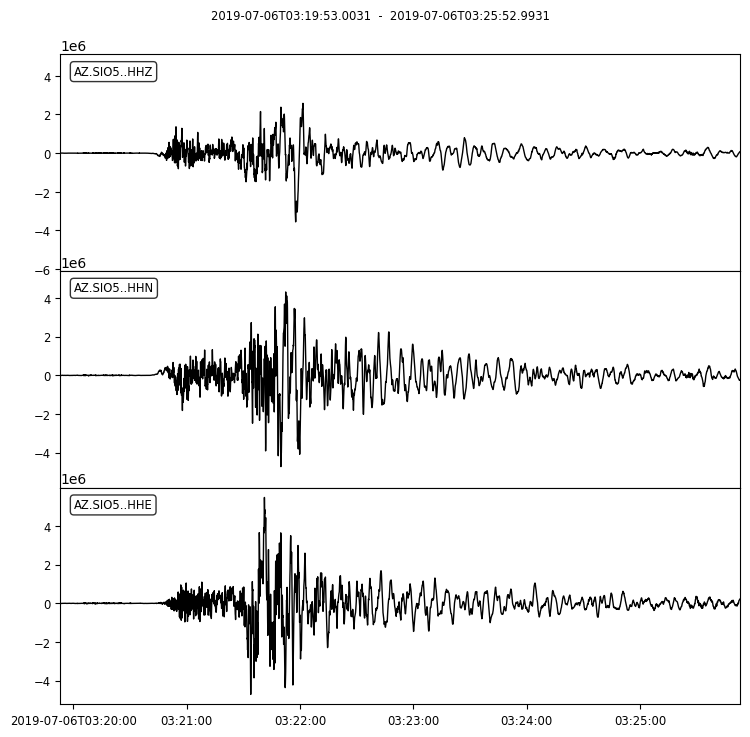

In [38]:
istream1 = client.get_waveforms('AZ', 'SIO5', '', 'HHZ,HHE,HHN', starttime=origin_time, endtime=origin_time+360)
istream1.plot()

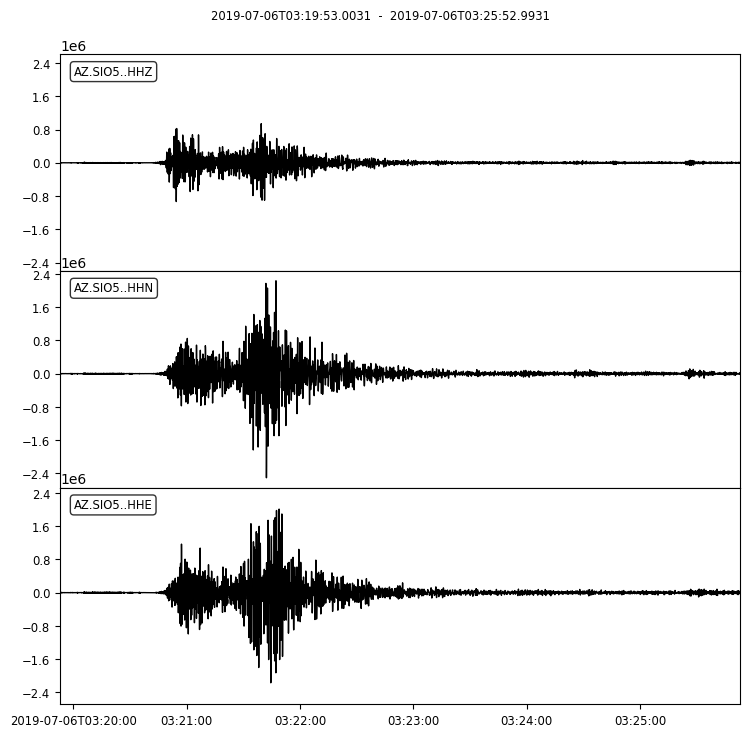

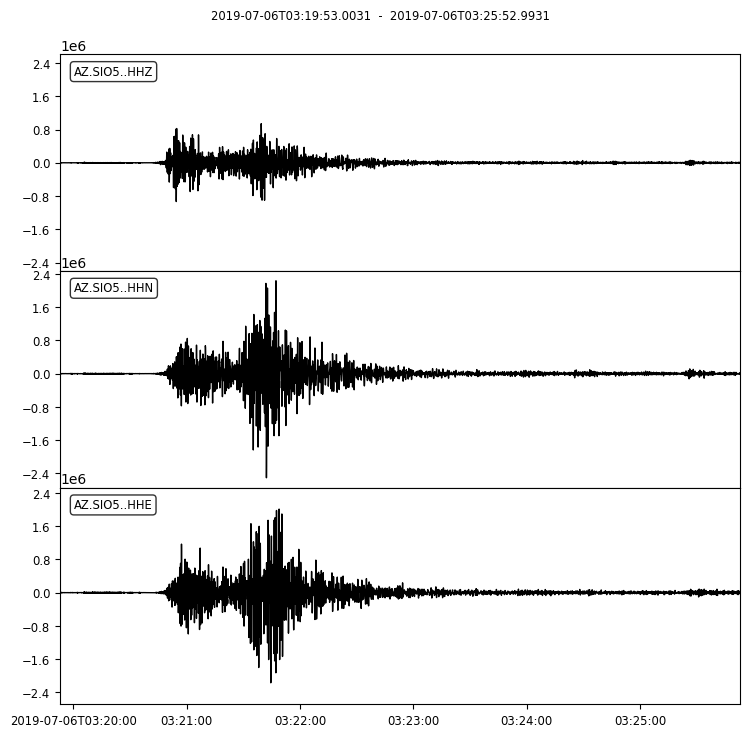

In [39]:
istream1.filter("highpass", freq=1.0)  
istream1.plot()

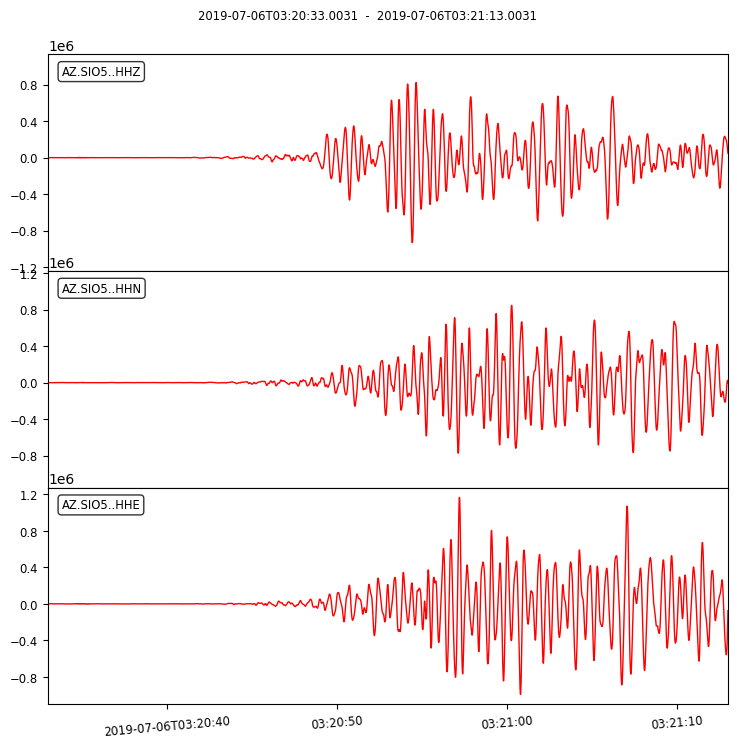

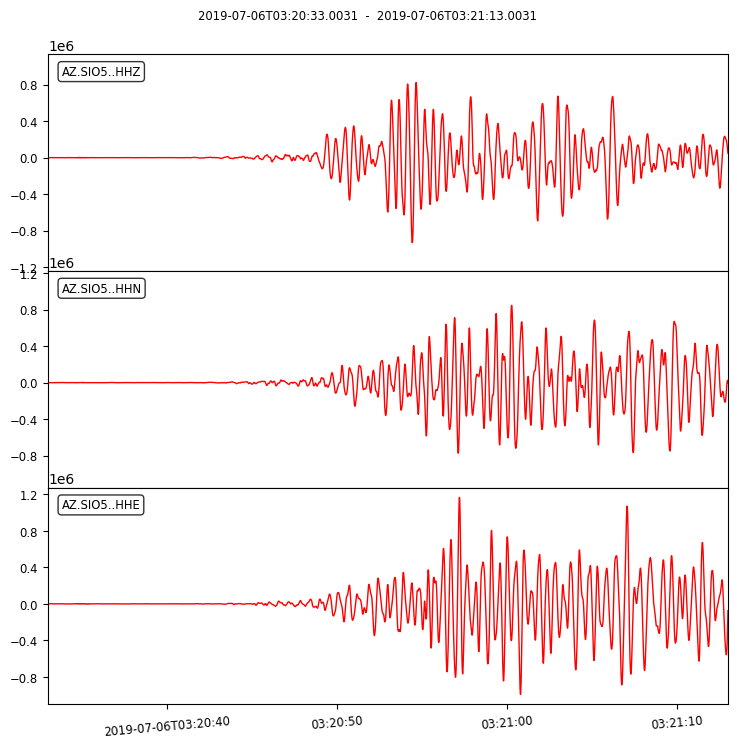

In [40]:
dt = istream1[0].stats.starttime
istream1.plot(color='red', number_of_ticks=7,
                   tick_rotation=5, tick_format='%I:%M %p',
                   starttime=dt+40 , endtime=dt + 80)


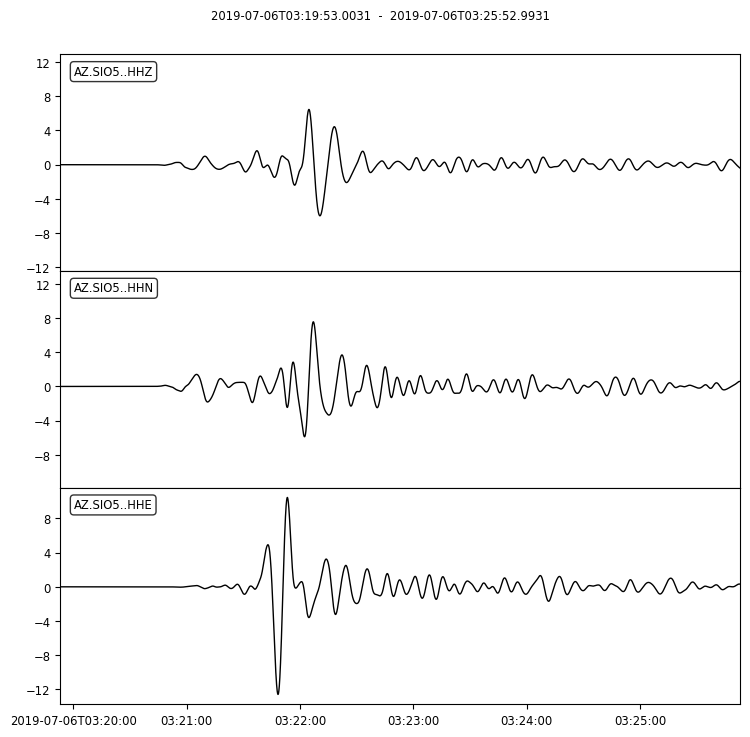

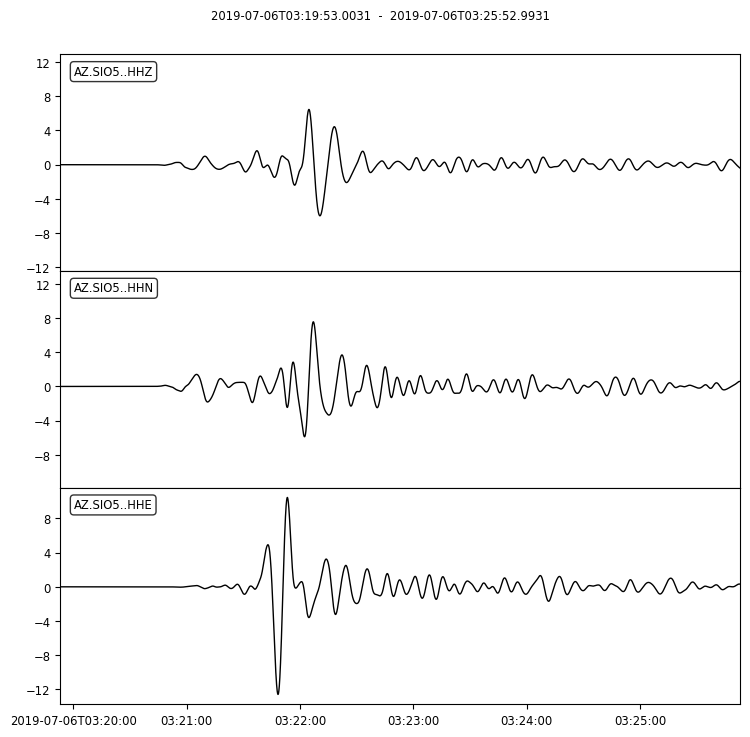

In [43]:
istream1.filter("lowpass", freq=0.05)  
istream1.plot()